# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Import the ticker module


df = pd.read_csv('./data/WHO_COVID19_cases.csv')

# filter df drop entries with nan cumulative_cases and date_reported
df_filtered = df.dropna(subset=['Cumulative_cases', 'Date_reported'])

# filter the data for 3 countries
df_filtered_countries = df_filtered[df_filtered['Country'].isin(['United States of America', 'Germany', 'China'])]

df_filtered


,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


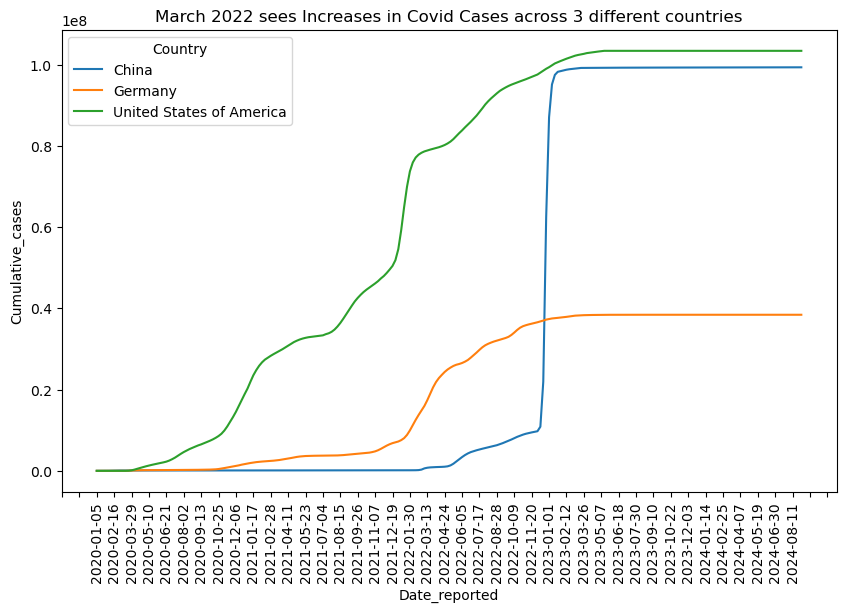

In [116]:
# Plot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))  # Set major ticks at an interval of 6
plt.title('March 2022 sees Increases in Covid Cases across 3 different countries')

# Line plot using seaborn
sns.lineplot(data=df_filtered_countries, x='Date_reported', y='Cumulative_cases', hue='Country');

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [60]:
import plotly.express as px
import plotly.io as pio
 
pio.renderers.default = 'notebook' 

In [100]:
# drop null values for our targets
filtered = df.dropna(subset=['Cumulative_cases', 'Cumulative_deaths'])

# filter the data for 3 countries
filtered_countries = filtered[filtered['Country'].isin(['Finland', 'Denmark', 'Switzerland'])]

filtered_countries


,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
13664,2020-01-05,DK,Denmark,Europe,EURO,NaN,0,NaN,0
13665,2020-01-12,DK,Denmark,Europe,EURO,NaN,0,NaN,0
13666,2020-01-19,DK,Denmark,Europe,EURO,NaN,0,NaN,0
13667,2020-01-26,DK,Denmark,Europe,EURO,NaN,0,NaN,0
13668,2020-02-02,DK,Denmark,Europe,EURO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
51479,2024-08-04,CH,Switzerland,Europe,EURO,430.0,4457878,NaN,14170
51480,2024-08-11,CH,Switzerland,Europe,EURO,469.0,4458347,NaN,14170
51481,2024-08-18,CH,Switzerland,Europe,EURO,517.0,4458864,NaN,14170
51482,2024-08-25,CH,Switzerland,Europe,EURO,568.0,4459432,NaN,14170


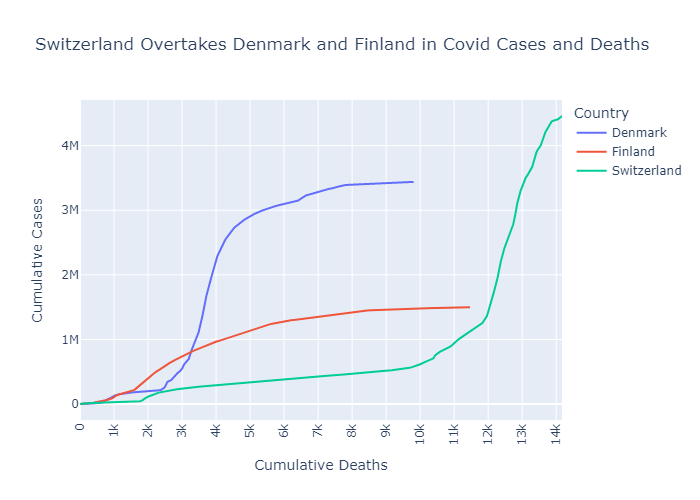

In [92]:
# Create the line plot using Plotly Express
lineplot = px.line(filtered_countries, 
              x='Cumulative_deaths', 
              y='Cumulative_cases', 
              color='Country', # our 3 countries
              title='Switzerland Overtakes Denmark and Finland in Covid Cases and Deaths',
              labels={'Cumulative_deaths': 'Cumulative Deaths', 'Cumulative_cases': 'Cumulative Cases'}
             )

# Update layout for better readability (rotate x-axis labels)
lineplot.update_layout(
    xaxis=dict(
        tickmode='auto',
        nticks=20  # You can change this depending on how dense you want the ticks
    ),
    xaxis_tickangle=-90  # Rotate the x-axis labels for better readability
)

# Show the plot
lineplot.show(renderer="png")